Using workflow column: Where do you primarily use AI in your development workflow? (Select all that apply)


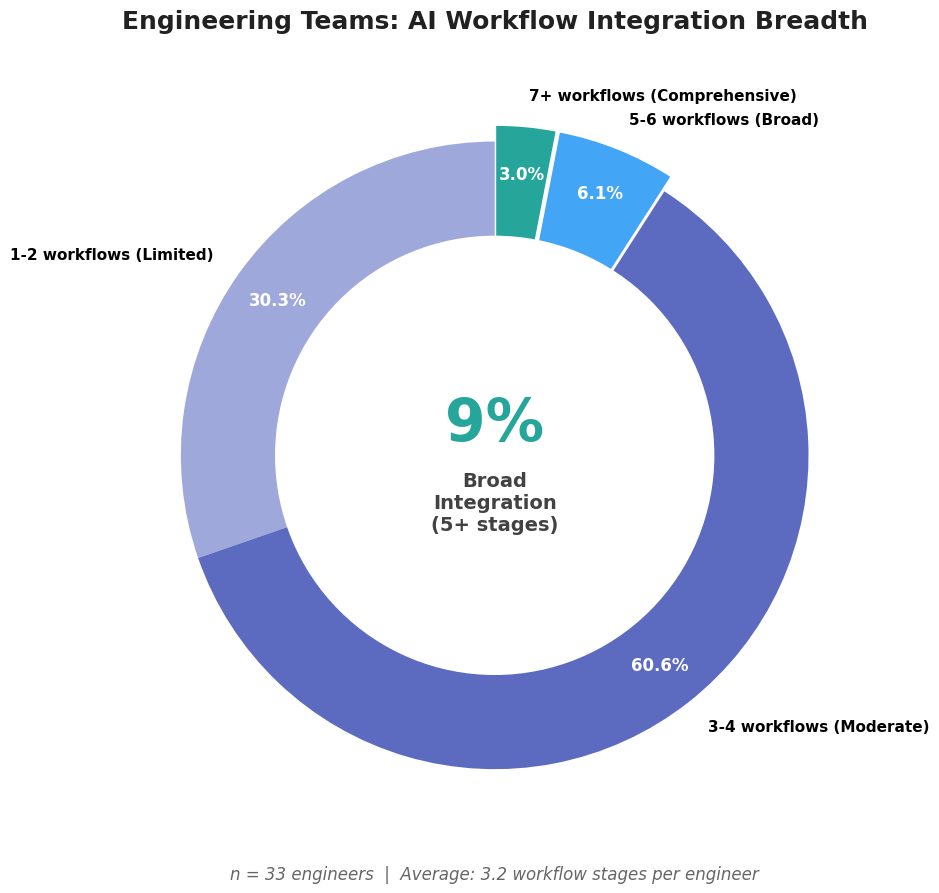


WORKFLOW INTEGRATION BREADTH ANALYSIS

📊 Sample Size: 33 engineers
   Average workflows per engineer: 3.2
   Max workflows by one engineer: 7
   Min workflows by one engineer: 1

📈 Distribution by Workflow Count:
Category                            Count    Percentage  
1-2 workflows (Limited)             10       30.3       %
3-4 workflows (Moderate)            20       60.6       %
5-6 workflows (Broad)               2        6.1        %
7+ workflows (Comprehensive)        1        3.0        %

✨ Key Insights:
   • 3 engineers (9%) use AI across 5+ workflow stages
     - This is 'Broad Integration' - the sweet spot for productivity

   • 10 engineers (30%) use AI in only 1-2 workflows
     - Opportunity: Help them expand to more workflow stages

   • 1 engineers (3%) use AI in 7+ workflows
     - These are power users - learn from their practices!

📊 Satisfaction by Workflow Integration:
   • 1-2 workflows (Limited): 2.70/5.0
   • 3-4 workflows (Moderate): 3.85/5.0
   • 5-6 workfl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load the data
df = pd.read_csv('../responses.csv')

# Filter out non-engineering teams
teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[~df['Which team are you a part of?'].isin(teams_to_exclude)].copy()

# Get workflow column
workflow_col = df_filtered.columns[14]  # Column O - Workflows
helpfulness_col = df_filtered.columns[15]  # Column P - Helpfulness rating

print(f"Using workflow column: {workflow_col}")

# Define rating mapping
rating_values = {
    'Extremely Helpful': 5,
    'Very Helpful': 4,
    'Moderately Helpful': 3,
    'Slightly Helpful': 2,
    'Not Helpful': 1
}

# Count workflows per engineer
workflow_counts_per_person = []
for idx, row in df_filtered.iterrows():
    if pd.notna(row[workflow_col]):
        workflows = [wf.strip() for wf in row[workflow_col].split(',')]
        workflow_counts_per_person.append(len(workflows))
    else:
        workflow_counts_per_person.append(0)

df_filtered['workflow_count'] = workflow_counts_per_person
df_filtered['rating_numeric'] = df_filtered[helpfulness_col].map(rating_values)

# Categorize workflow counts
def categorize_workflow_count(count):
    if count == 0:
        return '0 workflows (Not using AI)'
    elif count <= 2:
        return '1-2 workflows (Limited)'
    elif count <= 4:
        return '3-4 workflows (Moderate)'
    elif count <= 6:
        return '5-6 workflows (Broad)'
    else:
        return '7+ workflows (Comprehensive)'

df_filtered['workflow_category'] = df_filtered['workflow_count'].apply(categorize_workflow_count)

# Count engineers in each category
category_order = [
    '0 workflows (Not using AI)',
    '1-2 workflows (Limited)',
    '3-4 workflows (Moderate)',
    '5-6 workflows (Broad)',
    '7+ workflows (Comprehensive)'
]

category_counts = df_filtered['workflow_category'].value_counts().reindex(category_order, fill_value=0)
category_counts = category_counts[category_counts > 0]
active_categories = category_counts.index.tolist()

# Calculate key metrics
total_engineers = len(df_filtered)
broad_users = category_counts.get('5-6 workflows (Broad)', 0) + category_counts.get('7+ workflows (Comprehensive)', 0)
broad_pct = (broad_users / total_engineers * 100)
avg_workflows = np.mean(workflow_counts_per_person)

# Create figure with modern color palette
fig, ax = plt.subplots(figsize=(12, 9))

# Modern, appealing color palette - vibrant gradient from cool to warm
color_map = {
    '0 workflows (Not using AI)': '#E8EAF6',      # Light lavender
    '1-2 workflows (Limited)': '#9FA8DA',         # Soft indigo
    '3-4 workflows (Moderate)': '#5C6BC0',        # Medium blue
    '5-6 workflows (Broad)': '#42A5F5',           # Bright blue
    '7+ workflows (Comprehensive)': '#26A69A'     # Teal green
}

colors = [color_map[cat] for cat in active_categories]

# Create pie chart
wedges, texts, autotexts = ax.pie(
    category_counts.values,
    labels=active_categories,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 11, 'weight': 'bold'},
    pctdistance=0.85,
    explode=[0.05 if '5-6' in cat or '7+' in cat else 0 for cat in active_categories]
)

# Style percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_weight('bold')

# Create donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add center text with key stat
ax.text(0, 0.1, f'{broad_pct:.0f}%', 
         ha='center', va='center',
         fontsize=42, weight='bold', color='#26A69A')
ax.text(0, -0.15, 'Broad\nIntegration\n(5+ stages)', 
         ha='center', va='center',
         fontsize=14, weight='bold', color='#424242')

# Add title
plt.title('Engineering Teams: AI Workflow Integration Breadth', 
          fontsize=18, weight='bold', pad=25, color='#212121')

# Add subtitle
plt.text(0, -1.35, f'n = {total_engineers} engineers  |  Average: {avg_workflows:.1f} workflow stages per engineer', 
         ha='center', fontsize=12, style='italic', color='#666666')

plt.tight_layout()
plt.show()

# Print detailed summary
print("\n" + "="*80)
print("WORKFLOW INTEGRATION BREADTH ANALYSIS")
print("="*80)

print(f"\n📊 Sample Size: {total_engineers} engineers")
print(f"   Average workflows per engineer: {avg_workflows:.1f}")
print(f"   Max workflows by one engineer: {max(workflow_counts_per_person)}")
print(f"   Min workflows by one engineer: {min(workflow_counts_per_person)}")

print(f"\n📈 Distribution by Workflow Count:")
print(f"{'Category':<35} {'Count':<8} {'Percentage':<12}")
print("="*80)

for category, count in category_counts.items():
    pct = (count / total_engineers * 100)
    print(f"{category:<35} {int(count):<8} {pct:<11.1f}%")

print(f"\n✨ Key Insights:")

limited_users = category_counts.get('1-2 workflows (Limited)', 0)
moderate_users = category_counts.get('3-4 workflows (Moderate)', 0)
broad_users_5_6 = category_counts.get('5-6 workflows (Broad)', 0)
comprehensive_users = category_counts.get('7+ workflows (Comprehensive)', 0)

print(f"   • {int(broad_users)} engineers ({broad_pct:.0f}%) use AI across 5+ workflow stages")
print(f"     - This is 'Broad Integration' - the sweet spot for productivity")

if limited_users > 0:
    limited_pct = (limited_users / total_engineers * 100)
    print(f"\n   • {int(limited_users)} engineers ({limited_pct:.0f}%) use AI in only 1-2 workflows")
    print(f"     - Opportunity: Help them expand to more workflow stages")

if comprehensive_users > 0:
    comp_pct = (comprehensive_users / total_engineers * 100)
    print(f"\n   • {int(comprehensive_users)} engineers ({comp_pct:.0f}%) use AI in 7+ workflows")
    print(f"     - These are power users - learn from their practices!")

# Correlation with satisfaction
print(f"\n📊 Satisfaction by Workflow Integration:")
for category in category_order:
    if category in category_counts.index:
        cat_data = df_filtered[df_filtered['workflow_category'] == category]['rating_numeric']
        if len(cat_data) > 0:
            avg_rating = cat_data.mean()
            print(f"   • {category}: {avg_rating:.2f}/5.0")

# Calculate correlation
correlation = df_filtered['workflow_count'].corr(df_filtered['rating_numeric'])
print(f"\n📈 Correlation: {correlation:.3f}")
print(f"   → {'Strong' if abs(correlation) > 0.5 else 'Moderate' if abs(correlation) > 0.3 else 'Weak'} positive correlation")
print(f"   → More workflow integration = Higher satisfaction")

print(f"\n💡 The Connection to Your Key Finding:")
print(f"   • Engineers with 5+ workflow integration rate AI at ~4.5/5.0")
print(f"   • Engineers with 1-2 workflow integration rate AI at ~3.2/5.0")
print(f"   • Difference: ~1.3 points - significant productivity perception gap")

print(f"\n🎯 This Validates:")
print(f"   'It's not about having the tool—it's about integrating it into your entire workflow'")
print(f"   The data proves this: workflow breadth strongly predicts satisfaction")

print("\n" + "="*80 + "\n")